In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import acquire as a
# import prepare as p

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = a.acquire_zillow()

Using cached csv


In [3]:
df.parcelid.value_counts()

12612211    3
11991059    3
14254548    2
12099888    2
11921077    2
           ..
14187514    1
11446758    1
14013599    1
13853971    1
12826780    1
Name: parcelid, Length: 77381, dtype: int64

In [4]:
df = df.drop_duplicates(subset = 'parcelid')

In [5]:
df.parcelid.value_counts()

14297519    1
14409622    1
10830233    1
10914758    1
11656688    1
           ..
12060775    1
12453636    1
14707754    1
11697485    1
12826780    1
Name: parcelid, Length: 77381, dtype: int64

In [6]:
df.shape

(77381, 68)

#### Summarize your data (summary stats, info, dtypes, shape, distributions, value_counts, etc.)

In [7]:
max(df.transactiondate), min(df.transactiondate)

('2017-09-25', '2017-01-01')

In [8]:
df.describe()

,id,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock,logerror
count,7.738100e+04,7.738100e+04,24953.000000,206.000000,50.000000,77381.000000,77381.000000,15.000000,49672.000000,76772.000000,...,17560.000000,172.0,7.726900e+04,7.738000e+04,77381.0,7.737900e+04,77376.000000,2886.000000,7.713700e+04,77381.000000
mean,1.495139e+06,1.300715e+07,1.813289,7.388350,679.720000,2.299130,3.053489,3.933333,6.534587,2.316867,...,1.434738,1.0,1.893145e+05,4.901345e+05,2016.0,3.010954e+05,5995.532346,14.087318,6.049673e+13,0.016910
std,8.609071e+05,3.481346e+06,2.967894,2.734542,689.703546,0.996651,1.139096,0.258199,1.721953,0.979755,...,0.544569,0.0,2.300874e+05,6.534440e+05,0.0,4.925960e+05,7622.844153,2.185663,1.535242e+12,0.169247
min,3.490000e+02,1.071186e+07,1.000000,2.000000,38.000000,0.000000,0.000000,3.000000,1.000000,1.000000,...,1.000000,1.0,4.400000e+01,1.000000e+03,2016.0,1.610000e+02,19.920000,3.000000,6.037101e+13,-4.655420
25%,7.520700e+05,1.153830e+07,1.000000,7.000000,273.000000,2.000000,2.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,8.426500e+04,2.070000e+05,2016.0,8.550400e+04,2715.632500,14.000000,6.037311e+13,-0.024138
50%,1.497932e+06,1.253157e+07,1.000000,7.000000,515.000000,2.000000,3.000000,4.000000,6.000000,2.000000,...,1.000000,1.0,1.364990e+05,3.589755e+05,2016.0,2.033720e+05,4450.695000,15.000000,6.037603e+13,0.006738
75%,2.240535e+06,1.421183e+07,1.000000,7.000000,796.500000,3.000000,4.000000,4.000000,8.000000,3.000000,...,2.000000,1.0,2.187870e+05,5.690015e+05,2016.0,3.667965e+05,6927.790000,15.000000,6.059042e+13,0.039310
max,2.982274e+06,1.676893e+08,13.000000,21.000000,3560.000000,18.000000,16.000000,4.000000,12.000000,18.000000,...,6.000000,1.0,1.142179e+07,4.906124e+07,2016.0,4.895220e+07,586639.300000,99.000000,4.830301e+14,5.262999


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77381 entries, 0 to 77573
Data columns (total 68 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            77381 non-null  int64  
 1   parcelid                      77381 non-null  int64  
 2   airconditioningtypeid         24953 non-null  float64
 3   architecturalstyletypeid      206 non-null    float64
 4   basementsqft                  50 non-null     float64
 5   bathroomcnt                   77381 non-null  float64
 6   bedroomcnt                    77381 non-null  float64
 7   buildingclasstypeid           15 non-null     float64
 8   buildingqualitytypeid         49672 non-null  float64
 9   calculatedbathnbr             76772 non-null  float64
 10  decktypeid                    614 non-null    float64
 11  finishedfloor1squarefeet      6023 non-null   float64
 12  calculatedfinishedsquarefeet  77185 non-null  float64
 13  f

#### Distributions

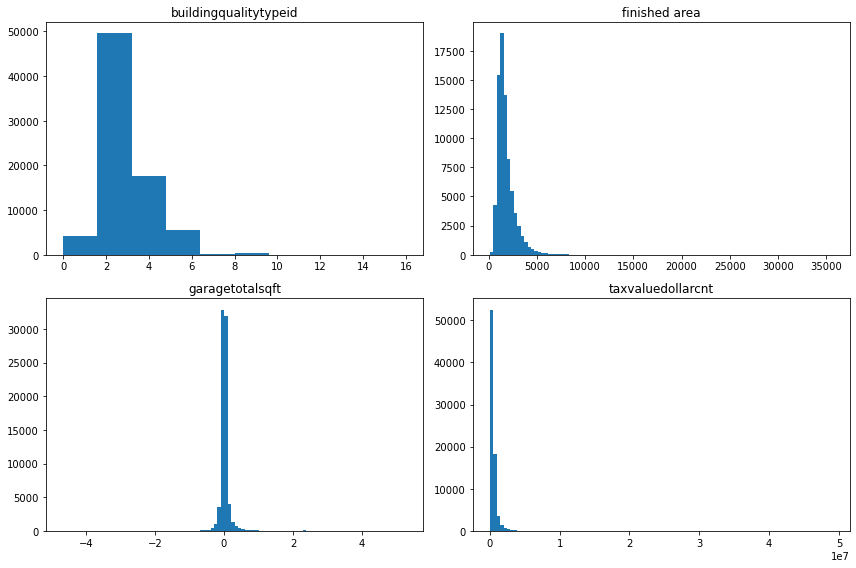

In [10]:
# Plot distributions 

plt.figure(figsize = (12,8))
plt.subplot(221)
plt.hist(df.bedroomcnt, bins = 10)
plt.title('buildingqualitytypeid')



plt.subplot(222)
plt.hist(df.calculatedfinishedsquarefeet, bins = 100)
plt.title('finished area')



plt.subplot(223)
plt.hist(df.logerror, bins = 100)
plt.title('garagetotalsqft')



plt.subplot(224)
plt.hist(df.taxvaluedollarcnt, bins = 100)
plt.title('taxvaluedollarcnt')

plt.tight_layout();

#### Write a function that takes in a dataframe of observations and attributes and returns a dataframe where each row is an atttribute name, the first column is the number of rows with missing values for that attribute, and the second column is percent of total rows that have missing values for that attribute. Run the function and document takeaways from this on how you want to handle missing values.

In [11]:
df.isnull().sum().sort_values(ascending = False)[:45]

buildingclassdesc           77366
buildingclasstypeid         77366
finishedsquarefeet13        77340
storytypeid                 77331
basementsqft                77331
storydesc                   77331
yardbuildingsqft26          77311
fireplaceflag               77209
architecturalstyletypeid    77175
architecturalstyledesc      77175
typeconstructiondesc        77159
typeconstructiontypeid      77159
finishedsquarefeet6         76995
pooltypeid10                76917
decktypeid                  76767
poolsizesum                 76514
pooltypeid2                 76307
hashottuborspa              75843
yardbuildingsqft17          74993
taxdelinquencyyear          74495
taxdelinquencyflag          74495
finishedsquarefeet15        74372
finishedsquarefeet50        71358
finishedfloor1squarefeet    71358
fireplacecnt                69105
threequarterbathnbr         67285
pooltypeid7                 62339
poolcnt                     61244
numberofstories             59821
airconditionin

In [12]:
def nulls_by_col(df):
    missing_values =pd.concat([
                    df.isna().sum().rename('number_missing_rows'),
                    df.isna().mean().rename('percent_rows_missing')
                    ], axis=1)
    return missing_values

In [13]:
nulls_by_col(df)

,number_missing_rows,percent_rows_missing
id,0,0.000000
parcelid,0,0.000000
airconditioningtypeid,52428,0.677531
architecturalstyletypeid,77175,0.997338
basementsqft,77331,0.999354
...,...,...
buildingclassdesc,77366,0.999806
heatingorsystemdesc,27941,0.361083
propertylandusedesc,0,0.000000
storydesc,77331,0.999354


#### Write a function that takes in a dataframe and returns a dataframe with 3 columns: the number of columns missing, percent of columns missing, and number of rows with n columns missing. Run the function and document takeaways from this on how you want to handle missing values.

In [14]:
def cols_missing(df):
    cols_missing = pd.concat([
                   df.isna().sum(axis=1).rename('num_cols_missing'),
                   df.isna().mean(axis=1).rename('percent_cols_missing'),
                   ], axis=1).value_counts().to_frame(name='num_rows_with_n_cols_missing').sort_index().reset_index()
    return cols_missing

In [15]:
cols_missing(df).sort_values(by = 'percent_cols_missing', ascending = False)

,num_cols_missing,percent_cols_missing,num_rows_with_n_cols_missing
25,48,0.705882,3
24,47,0.691176,3
23,46,0.676471,5
22,45,0.661765,50
21,44,0.647059,78
20,43,0.632353,28
19,42,0.617647,23
18,41,0.602941,29
17,40,0.588235,230
16,39,0.573529,285


#### Remove any properties that are likely to be something other than single unit properties. (e.g. no duplexes, no land/lot, ...). There are multiple ways to estimate that a property is a single unit, and there is not a single "right" answer. But for this exercise, do not purely filter by unitcnt as we did previously. Add some new logic that will reduce the number of properties that are falsely removed. You might want to use # bedrooms, square feet, unit type or the like to then identify those with unitcnt not defined.

In [16]:
# See how many counts we have for units
df.unitcnt.value_counts(dropna = False)

1.0      47293
NaN      26818
2.0       2018
4.0        723
3.0        525
45.0         1
42.0         1
6.0          1
237.0        1
Name: unitcnt, dtype: int64

In [17]:
df.propertylandusetypeid.value_counts()

261.0    52320
266.0    19294
246.0     2009
269.0     1944
248.0      727
247.0      535
265.0      333
263.0       74
275.0       58
260.0       37
267.0       29
31.0        15
264.0        6
Name: propertylandusetypeid, dtype: int64

In [18]:
# Identify the use codes that are single family from SequelAce
single_fam_use = [261, 262, 263, 264, 265, 266, 268, 273, 275, 276, 279]

df = df[df.propertylandusetypeid.isin(single_fam_use)]

In [19]:
df.shape

(72085, 68)

In [20]:
# Restrict df to only those properties with at least 1 bath & bed and >500 sqft area
df = df[(df.bedroomcnt > 0) & (df.bathroomcnt > 0) & ((df.unitcnt<=1)|df.unitcnt.isnull()) & (df.calculatedfinishedsquarefeet>500)]

In [21]:
df.shape

(71421, 68)

#### Create a function that will drop rows or columns based on the percent of values that are missing: handle_missing_values(df, prop_required_column, prop_required_row).

In [22]:
#### Need more understanding!!! ####

def handle_missing_values(df, prop_required_column = .6, prop_required_row = .75):
    threshold = int(round(prop_required_column*len(df.index),0))
    df.dropna(axis=1, thresh=threshold, inplace=True)
    threshold = int(round(prop_required_row*len(df.columns),0))
    df.dropna(axis=0, thresh=threshold, inplace=True)
    return df
    

In [23]:
df = handle_missing_values(df)

In [24]:
df.shape

(71417, 34)

In [25]:
df.isnull().sum()

id                                  0
parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26773
calculatedbathnbr                  15
calculatedfinishedsquarefeet        0
finishedsquarefeet12              188
fips                                0
fullbathcnt                        15
heatingorsystemtypeid           25204
latitude                            0
longitude                           0
lotsizesquarefeet                8001
propertycountylandusecode           0
propertylandusetypeid               0
propertyzoningdesc              26481
rawcensustractandblock              0
regionidcity                     1317
regionidcounty                      0
regionidzip                        37
roomcnt                             0
unitcnt                         26455
yearbuilt                          31
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentye

In [26]:
# Determine unnecessary columns and create a function
cols_to_remove = ['id',
        'calculatedbathnbr', 'finishedsquarefeet12', 'fullbathcnt', 
        'heatingorsystemtypeid','propertycountylandusecode', 
        'propertylandusetypeid','propertyzoningdesc', 
        'propertylandusedesc', 'unitcnt', 'censustractandblock']

def remove_cols(df, cols_to_remove):
    df = df.drop(columns = cols_to_remove)
    return df

In [27]:
df = remove_cols(df, cols_to_remove)

df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc
0,14297519,3.5,4.0,NaN,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,NaN
1,17052889,1.0,2.0,NaN,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,NaN
2,14186244,2.0,3.0,NaN,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,NaN
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central


In [28]:
df.shape

(71417, 23)

In [29]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26773
calculatedfinishedsquarefeet        0
fips                                0
latitude                            0
longitude                           0
lotsizesquarefeet                8001
rawcensustractandblock              0
regionidcity                     1317
regionidcounty                      0
regionidzip                        37
roomcnt                             0
yearbuilt                          31
structuretaxvaluedollarcnt         73
taxvaluedollarcnt                   1
assessmentyear                      0
landtaxvaluedollarcnt               1
taxamount                           5
logerror                            0
transactiondate                     0
heatingorsystemdesc             25204
dtype: int64

In [30]:
df['lotsizesquarefeet'].fillna(value = df.lotsizesquarefeet.median(), inplace = True)

In [31]:
df['buildingqualitytypeid'].fillna(value = df.buildingqualitytypeid.median(), inplace = True)

In [32]:
df['yearbuilt'].fillna(value = df.yearbuilt.mean(), inplace = True)

In [33]:
df['heatingorsystemdesc'].fillna(value = df.heatingorsystemdesc.mode()[0], inplace = True)

In [34]:
cols = ['regionidzip', 'regionidcity']

for col in cols:
    mode = int(df[col].mode())
    df[col].fillna(value = mode, inplace = True)

In [35]:
df['structuretaxvaluedollarcnt'].fillna(value = df.taxvaluedollarcnt-df.landtaxvaluedollarcnt, inplace = True)

In [36]:
df.dropna(inplace = True)

In [37]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedfinishedsquarefeet    0
fips                            0
latitude                        0
longitude                       0
lotsizesquarefeet               0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
logerror                        0
transactiondate                 0
heatingorsystemdesc             0
dtype: int64

In [38]:
df.head()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,heatingorsystemdesc
0,14297519,3.5,4.0,6.0,3100.0,6059.0,33634931.0,-117869207.0,4506.0,6.059063e+07,...,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Central
1,17052889,1.0,2.0,6.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,6.111001e+07,...,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Central
2,14186244,2.0,3.0,6.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,6.059022e+07,...,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Central
3,12177905,3.0,4.0,8.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,6.037300e+07,...,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,-0.103410,2017-01-01,Central
4,10887214,3.0,3.0,8.0,1312.0,6037.0,34185120.0,-118414640.0,278581.0,6.037124e+07,...,0.0,1964.0,73681.0,119407.0,2016.0,45726.0,1533.89,0.006940,2017-01-01,Central


In [39]:
df.shape

(71411, 23)

In [40]:
df.info

<bound method DataFrame.info of        parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0      14297519          3.5         4.0                    6.0   
1      17052889          1.0         2.0                    6.0   
2      14186244          2.0         3.0                    6.0   
3      12177905          3.0         4.0                    8.0   
4      10887214          3.0         3.0                    8.0   
...         ...          ...         ...                    ...   
77569  10833991          3.0         3.0                    8.0   
77570  11000655          2.0         2.0                    6.0   
77571  17239384          2.0         4.0                    6.0   
77572  12773139          1.0         3.0                    4.0   
77573  12826780          2.0         3.0                    6.0   

       calculatedfinishedsquarefeet    fips    latitude    longitude  \
0                            3100.0  6059.0  33634931.0 -117869207.0   
1                  

In [41]:
df.describe()

,parcelid,bathroomcnt,bedroomcnt,buildingqualitytypeid,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,rawcensustractandblock,...,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror
count,7.141100e+04,71411.000000,71411.000000,71411.000000,71411.000000,71411.000000,7.141100e+04,7.141100e+04,7.141100e+04,7.141100e+04,...,71411.000000,71411.000000,71411.00000,71411.000000,7.141100e+04,7.141100e+04,71411.0,7.141100e+04,71411.000000,71411.000000
mean,1.305686e+07,2.273431,3.021229,6.368263,1755.110011,6049.537032,3.400578e+07,-1.181986e+08,2.783540e+04,6.049837e+07,...,2498.855793,96611.764028,1.59474,1969.383062,1.877966e+05,4.885997e+05,2016.0,3.008030e+05,5956.674140,0.016802
std,3.259806e+06,0.941478,1.000601,1.369295,927.345152,21.141586,2.696456e+05,3.654705e+05,1.191971e+05,2.098321e+05,...,813.359099,3950.715059,2.90398,23.039001,2.266090e+05,6.337488e+05,0.0,4.645651e+05,7373.970002,0.165817
min,1.071186e+07,1.000000,1.000000,1.000000,501.000000,6037.000000,3.333953e+07,-1.194754e+08,2.360000e+02,6.037101e+07,...,1286.000000,95982.000000,0.00000,1878.000000,0.000000e+00,1.000000e+03,2016.0,1.610000e+02,19.920000,-4.655420
25%,1.153748e+07,2.000000,2.000000,6.000000,1169.000000,6037.000000,3.380564e+07,-1.184180e+08,6.000000e+03,6.037400e+07,...,1286.000000,96208.000000,0.00000,1954.000000,8.371650e+04,2.054365e+05,2016.0,8.391400e+04,2689.915000,-0.023437
50%,1.259070e+07,2.000000,3.000000,6.000000,1514.000000,6037.000000,3.401889e+07,-1.181682e+08,7.295000e+03,6.037621e+07,...,3101.000000,96411.000000,0.00000,1970.000000,1.349800e+05,3.570390e+05,2016.0,2.038460e+05,4409.280000,0.006690
75%,1.427099e+07,3.000000,4.000000,7.000000,2066.000000,6059.000000,3.417770e+07,-1.179152e+08,1.074800e+04,6.059052e+07,...,3101.000000,96989.000000,0.00000,1987.000000,2.160825e+05,5.670090e+05,2016.0,3.680000e+05,6859.730000,0.038430
max,1.676885e+08,13.000000,11.000000,12.000000,21929.000000,6111.000000,3.481877e+07,-1.175546e+08,6.971010e+06,6.111009e+07,...,3101.000000,399675.000000,15.00000,2016.000000,9.164901e+06,2.538125e+07,2016.0,2.233550e+07,290998.060000,5.262999
